In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
def moving(currentState, currentAction):
    nextState = 0
    reward = -1
    if currentAction == 0:
        nextState = [max(currentState[0]-1,0),currentState[1]]
    elif currentAction == 2:
        nextState = [currentState[0],max(currentState[1]-1,0)]
    elif currentAction == 3:
        nextState = [currentState[0],min(currentState[1]+1,11)]
    elif currentAction == 1:
        nextState = [min(currentState[0]+1,3),currentState[1]]
    # if reach the cliff
    if currentAction==3 and currentState==startState:
        reward = -100
        nextState = startState
    if currentAction==1 and (currentState[1]>=1 and currentState[1]<=10) and currentState[0]==2:
        reward = -100
        nextState = startState
    return nextState, reward

In [3]:
def GreedyActionSelection(actionStateValue, currentState):
    if np.random.binomial(1,0.1)!=1:
        asv = actionStateValue[currentState[0], currentState[1], :]
        temp = []
        for greedyAction, greedyActionValue in enumerate(asv):
            if greedyActionValue==np.max(asv):
                temp.append(greedyAction)
        return np.random.choice(temp)
    else:
        return np.random.choice(actionSet)

In [4]:
def Qlearning(actionStateValue):
    totalReward = 0
    currentState = startState
    # while episode doesn't terminate
    while currentState!=terminalState:
        greedyAction = GreedyActionSelection(actionStateValue, currentState)
        nextState, currentReward = moving(currentState, greedyAction)
        totalReward += currentReward
        #update rule
        actionStateValue[currentState[0], currentState[1], greedyAction] += 0.5*(currentReward + 
        np.max(actionStateValue[nextState[0],nextState[1],:]) - actionStateValue[currentState[0],currentState[1],greedyAction])
        currentState = nextState
    return totalReward

In [5]:
def SARSA(actionStateValue):
    totalReward = 0
    currentState = startState
    greedyAction = GreedyActionSelection(actionStateValue, currentState)
    # while episode doesn't terminate
    while currentState!=terminalState:
        nextState, currentReward = moving(currentState, greedyAction)
        nextGreedyAction = GreedyActionSelection(actionStateValue, nextState)
        totalReward += currentReward
        #update rule
        actionStateValue[currentState[0], currentState[1], greedyAction] += 0.5*(currentReward 
        + actionStateValue[nextState[0], nextState[1], nextGreedyAction] - actionStateValue[currentState[0], currentState[1], greedyAction])
        currentState = nextState
        greedyAction = nextGreedyAction
    return totalReward

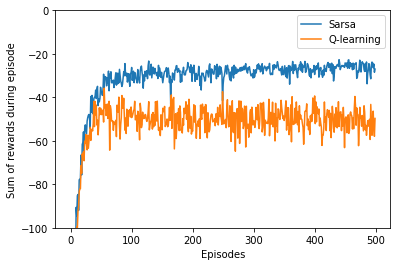

In [6]:
# Initialization
gridWidth = 12
gridHeight = 4
startState = [3,0]
terminalState = [3,11]
actionSet = [0,1,2,3]


SARSA_return = np.zeros(500)
Qlearning_return = np.zeros(500)
for iterations in range(0,200):
    SARSA_actionStateValue = np.zeros((4,12,4))
    Qlearning_actionStateValue = np.zeros((4,12,4))
    for episode in range(0,500):
        SARSA_return[episode] = SARSA_return[episode] + SARSA(SARSA_actionStateValue)
        Qlearning_return[episode] = Qlearning_return[episode] + Qlearning(Qlearning_actionStateValue)
    
Qlearning_return /= 200
SARSA_return /= 200
plt.plot(SARSA_return, label='Sarsa')
plt.plot(Qlearning_return, label='Q-learning')
plt.ylim([-100, 0])
plt.ylabel('Sum of rewards during episode')
plt.xlabel('Episodes')
plt.legend()